In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n0=1
k=1.381e-23
T0=0
m0=4*1.66054e-27
m=9.11e-31
E=1e-21*n0
q=1.602e-19

In [19]:
n=1000
B=np.zeros((n,1))
A=np.zeros((n,n))

vmin=1e3
vmax=10*np.sqrt(24*1.602e-19/m)
v=np.logspace(np.log10(vmin),np.log10(vmax),n)
v=np.reshape(v,(n,1))
ratio=(vmax/vmin)**(1.0/(n-1))
dv=v[1:]-v[:n-1] #v*(ratio-1)

In [20]:
def vm(v):
    return 5e-20*n0*np.sqrt(2/m*1.6e-19)
def dvm(v):
    return 0

In [21]:
def a(v):
    return k*T0*vm(v)/m0 + q**2*E**2/(3*vm(v))
def b(v):
    return (k*T0*(2*v*vm(v)+v**2*dvm(v))/m + v**3*vm(v))*m/(m0*v**2) -q*E*(v**2*q*E*dvm(v)/(m*vm(v)**2) - 2*v*q*E/(m*vm(v)))/(3*m*v**2) # v**3*vm(v)*m/(m0*v**2) + 2*v*q**2*E**2/(m*vm(v))/(3*m*v**2)
def c(v):
    return m*((2*v*vm(v)+v**2*dvm(v))*v + v**2*vm(v))/(m0*v**2)

In [22]:
def alpha(i):
    return a(v[i])/dv[i-1]**2
def beta(i):
    return -(2*a(v[i])/dv[i-1]**2+b(v[i])/dv[i-1])
def gamma(i):
    return a(v[i])/dv[i-1]**2+b(v[i])/dv[i-1]+c(v[i])

In [23]:
B[0,0]=1
B[1,0]=1

A[0,0]=1
A[1,1]=1
for i in range(2,n-1):
    A[i,i-2]=alpha(i)
    A[i,i-1]=beta(i)
    A[i,i]=gamma(i)
A[n-1,n-1]=1    
print(A)    

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.83575691e-69  -6.75935683e-11   6.75935805e-11 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.23283803e-16
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -4.11087234e-16
    4.23280389e-16   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]


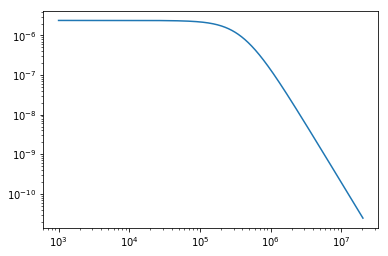

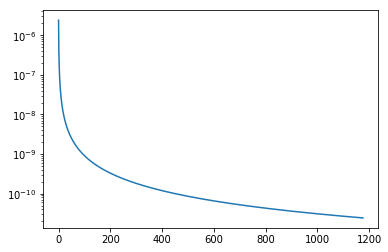

In [24]:
f0=np.matmul(np.linalg.inv(A),B)
f0=f0[:n-1]
v=v[:n-1]

mu=-3*m**3*vm(v)**2/(q**2*E**2)
f_anyl=np.sqrt(-2*mu/np.pi)*np.exp(mu*v**2/2)
g_anyl=mu*v*np.sqrt(-2*mu/np.pi)*np.exp(mu*v**2/2)

f0=f0/np.sum(f0*dv) #Normalising f0
plt.loglog(v,f0)
plt.show()
plt.semilogy(0.5*m*v**2/q,f0)
plt.show()

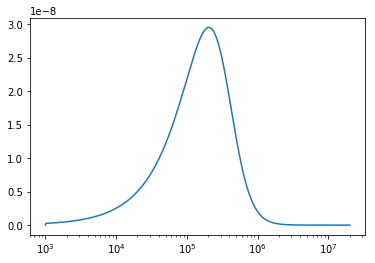

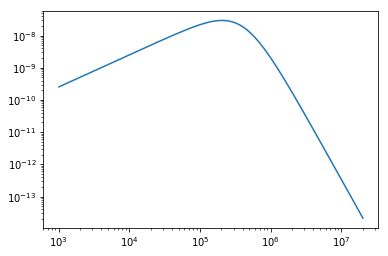

In [35]:
f1=-q*E*(f0[1:]-f0[:n-2])/dv[:n-2]/(m*vm(v[:n-2]))
plt.semilogx(v[:n-2],f1[:n-2])
plt.show()
plt.loglog(v[:n-2],f1[:n-2])
plt.show()

In [26]:
np.shape(f1)

(998, 1)

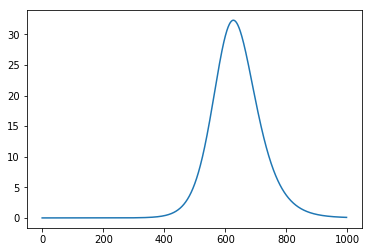

In [27]:
W=np.sum(dv[:n-2]*f1[:n-2]*v[:n-2])
plt.plot(dv[:n-2]*f1[:n-2]*v[:n-2])
plt.show()

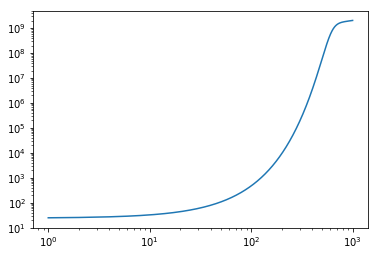

In [28]:
eps=np.sum(0.5*m*v**2*f0*dv)
plt.loglog(v**2*f0*dv)
plt.show()

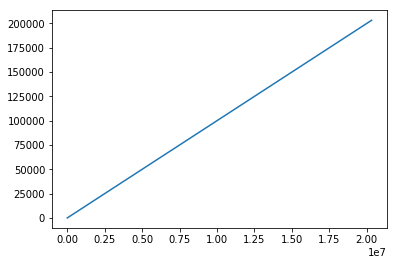

In [29]:
plt.plot(v[:n-1],dv)
plt.show()

In [30]:
np.sum(f1*dv[:n-2])

0.014225395256629183

In [31]:
print(W/1e4,eps/1.6e-19)

0.58865921707 1.90992384602


In [32]:
W0=0.593e4
eps0=0.7291*1.6e-19

In [33]:
print((1-W/W0)*100,(1-eps/eps0)*100)

0.732003866798 -161.956363464


In [34]:
m/m0*1e4

1.3715417876112592